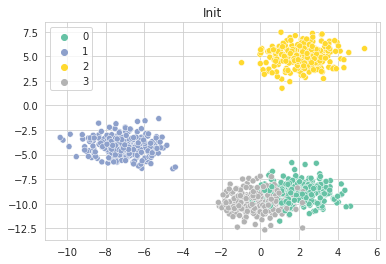

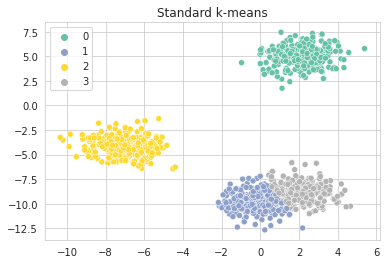

/home/julius/.local/share/virtualenvs/code-oYwF_TsS/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


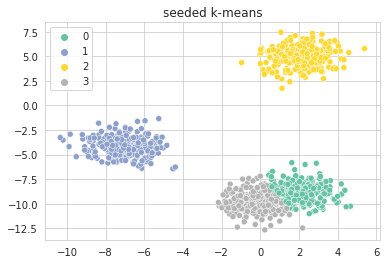

<Figure size 432x288 with 0 Axes>

In [46]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set_style("whitegrid")

n_classes = 4
X, y = make_blobs(n_samples=1000, n_features = 2, centers=n_classes)

# ground truth
fig = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=sns.color_palette('Set2', as_cmap=True))
fig.set_title("Init")
plt.show()
plt.clf()

# k-means
cluster = KMeans(n_clusters=n_classes).fit_predict(X)

fig = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=cluster, palette=sns.color_palette('Set2', as_cmap=True))
fig.set_title("Standard k-means")
plt.show()
plt.clf()

# seeded k-means
seed_medoids = []

for c in range(n_classes):
    # calculate medoid
    medoid = np.mean(X[np.where(y==c)], axis=0)
    seed_medoids.append(medoid)

cluster = KMeans(n_clusters=n_classes, init=np.array(seed_medoids)).fit_predict(X)

fig = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=cluster, palette=sns.color_palette('Set2', as_cmap=True))
fig.set_title("seeded k-means")
plt.show()
plt.clf()